# Importing libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from pandas.plotting import scatter_matrix
import warnings
warnings.filterwarnings('ignore')
import pickle

# Data Collection

In [2]:
df=pd.read_csv("winequality-red.csv")

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Exploratory Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
#Data is in correct format

In [6]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
#Handling Missing Values

In [8]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [9]:
#we  have no missing values

In [10]:
#Handling Duplicate data

In [11]:
df.duplicated().sum()

240

In [12]:
df.loc[df.duplicated(), :]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
11,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
27,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5
40,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33,0.83,10.5,5
65,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.9,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1563,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1564,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1567,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1581,6.2,0.560,0.09,1.70,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5


In [13]:
df.drop_duplicates(keep='first',inplace=True)

In [14]:
df.duplicated().sum()

0

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1359 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1359 non-null   float64
 1   volatile acidity      1359 non-null   float64
 2   citric acid           1359 non-null   float64
 3   residual sugar        1359 non-null   float64
 4   chlorides             1359 non-null   float64
 5   free sulfur dioxide   1359 non-null   float64
 6   total sulfur dioxide  1359 non-null   float64
 7   density               1359 non-null   float64
 8   pH                    1359 non-null   float64
 9   sulphates             1359 non-null   float64
 10  alcohol               1359 non-null   float64
 11  quality               1359 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 138.0 KB


In [16]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.255124,0.667437,0.111025,0.085886,-0.140580,-0.103777,0.670195,-0.686685,0.190269,-0.061596,0.119024
volatile acidity,-0.255124,1.000000,-0.551248,-0.002449,0.055154,-0.020945,0.071701,0.023943,0.247111,-0.256948,-0.197812,-0.395214
citric acid,0.667437,-0.551248,1.000000,0.143892,0.210195,-0.048004,0.047358,0.357962,-0.550310,0.326062,0.105108,0.228057
residual sugar,0.111025,-0.002449,0.143892,1.000000,0.026656,0.160527,0.201038,0.324522,-0.083143,-0.011837,0.063281,0.013640
chlorides,0.085886,0.055154,0.210195,0.026656,1.000000,0.000749,0.045773,0.193592,-0.270893,0.394557,-0.223824,-0.130988
free sulfur dioxide,-0.140580,-0.020945,-0.048004,0.160527,0.000749,1.000000,0.667246,-0.018071,0.056631,0.054126,-0.080125,-0.050463
total sulfur dioxide,-0.103777,0.071701,0.047358,0.201038,0.045773,0.667246,1.000000,0.078141,-0.079257,0.035291,-0.217829,-0.177855
density,0.670195,0.023943,0.357962,0.324522,0.193592,-0.018071,0.078141,1.000000,-0.355617,0.146036,-0.504995,-0.184252
pH,-0.686685,0.247111,-0.550310,-0.083143,-0.270893,0.056631,-0.079257,-0.355617,1.000000,-0.214134,0.213418,-0.055245
sulphates,0.190269,-0.256948,0.326062,-0.011837,0.394557,0.054126,0.035291,0.146036,-0.214134,1.000000,0.091621,0.248835


array([[<AxesSubplot:xlabel='alcohol', ylabel='alcohol'>,
        <AxesSubplot:xlabel='volatile acidity', ylabel='alcohol'>,
        <AxesSubplot:xlabel='citric acid', ylabel='alcohol'>,
        <AxesSubplot:xlabel='sulphates', ylabel='alcohol'>],
       [<AxesSubplot:xlabel='alcohol', ylabel='volatile acidity'>,
        <AxesSubplot:xlabel='volatile acidity', ylabel='volatile acidity'>,
        <AxesSubplot:xlabel='citric acid', ylabel='volatile acidity'>,
        <AxesSubplot:xlabel='sulphates', ylabel='volatile acidity'>],
       [<AxesSubplot:xlabel='alcohol', ylabel='citric acid'>,
        <AxesSubplot:xlabel='volatile acidity', ylabel='citric acid'>,
        <AxesSubplot:xlabel='citric acid', ylabel='citric acid'>,
        <AxesSubplot:xlabel='sulphates', ylabel='citric acid'>],
       [<AxesSubplot:xlabel='alcohol', ylabel='sulphates'>,
        <AxesSubplot:xlabel='volatile acidity', ylabel='sulphates'>,
        <AxesSubplot:xlabel='citric acid', ylabel='sulphates'>,
        <Ax

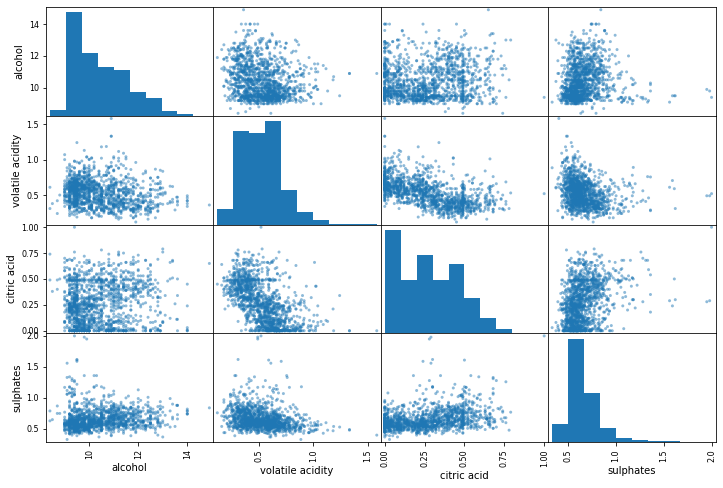

In [17]:
attributes = ["alcohol", "volatile acidity", "citric acid", "sulphates"]
scatter_matrix(df[attributes], figsize = (12,8))

In [18]:
def outlier_finder(check):
    q1,q3=df[check].quantile(0.25),df[check].quantile(0.75)
    iqr=q3-q1
    lower_limit,upper_limit=q1-1.5*iqr,q3+1.5*iqr
    return df[(df[check]<lower_limit)|(df[check]>upper_limit)]

In [19]:
def outlier_remover(checks):
    Q1,Q3=df[checks].quantile(0.25),df[checks].quantile(0.75)
    IQR=Q3-Q1
    Lower_limit,Upper_limit=Q1-1.5*IQR,Q3+1.5*IQR
    return df[(df[checks]>=Lower_limit)&(df[checks]<=Upper_limit)]

In [20]:
#removing outliers of fixed acidity

<AxesSubplot:>

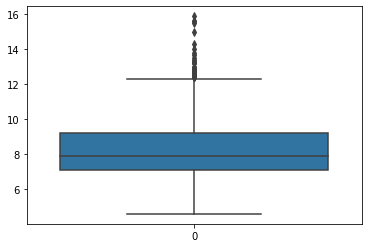

In [21]:
sns.boxplot(data=df['fixed acidity'])

In [22]:
outlier_finder('fixed acidity')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
205,12.8,0.300,0.74,2.6,0.095,9.0,28.0,0.99940,3.20,0.77,10.8,7
243,15.0,0.210,0.44,2.2,0.075,10.0,24.0,1.00005,3.07,0.84,9.2,7
264,12.5,0.560,0.49,2.4,0.064,5.0,27.0,0.99990,3.08,0.87,10.9,5
294,13.3,0.340,0.52,3.2,0.094,17.0,53.0,1.00140,3.05,0.81,9.5,6
328,13.4,0.270,0.62,2.6,0.082,6.0,21.0,1.00020,3.16,0.67,9.7,6
338,12.4,0.490,0.58,3.0,0.103,28.0,99.0,1.00080,3.16,1.00,11.5,6
339,12.5,0.280,0.54,2.3,0.082,12.0,29.0,0.99970,3.11,1.36,9.8,7
347,13.8,0.490,0.67,3.0,0.093,6.0,15.0,0.99860,3.02,0.93,12.0,6
353,13.5,0.530,0.79,4.8,0.120,23.0,77.0,1.00180,3.18,0.77,13.0,5
359,12.6,0.380,0.66,2.6,0.088,10.0,41.0,1.00100,3.17,0.68,9.8,6


In [23]:
df=outlier_remover('fixed acidity')

<AxesSubplot:>

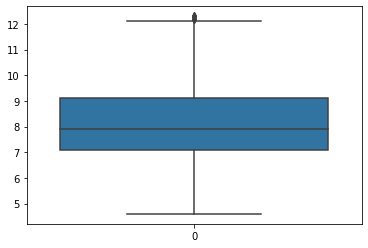

In [24]:
sns.boxplot(data=df['fixed acidity'])

In [25]:
#removing outliers of volatile acidity

<AxesSubplot:>

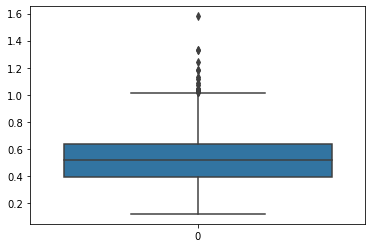

In [26]:
sns.boxplot(data=df['volatile acidity'])

In [27]:
outlier_finder('volatile acidity')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
38,5.7,1.130,0.09,1.50,0.172,7.0,19.0,0.99400,3.50,0.48,9.8,4
94,5.0,1.020,0.04,1.40,0.045,41.0,85.0,0.99380,3.75,0.48,10.5,4
120,7.3,1.070,0.09,1.70,0.178,10.0,89.0,0.99620,3.30,0.57,9.0,5
126,8.2,1.330,0.00,1.70,0.081,3.0,12.0,0.99640,3.53,0.49,10.9,5
127,8.1,1.330,0.00,1.80,0.082,3.0,12.0,0.99640,3.54,0.48,10.9,5
134,7.9,1.040,0.05,2.20,0.084,13.0,29.0,0.99590,3.22,0.55,9.9,6
199,6.9,1.090,0.06,2.10,0.061,12.0,31.0,0.99480,3.51,0.43,11.4,4
553,5.0,1.040,0.24,1.60,0.050,32.0,96.0,0.99340,3.74,0.62,11.5,5
672,9.8,1.240,0.34,2.00,0.079,32.0,151.0,0.99800,3.15,0.53,9.5,5
690,7.4,1.185,0.00,4.25,0.097,5.0,14.0,0.99660,3.63,0.54,10.7,3


In [28]:
df=outlier_remover('volatile acidity')

<AxesSubplot:>

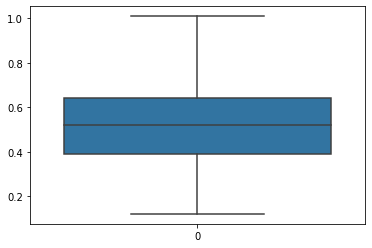

In [29]:
sns.boxplot(data=df['volatile acidity'])

In [30]:
#removing outliers of citric acid

<AxesSubplot:>

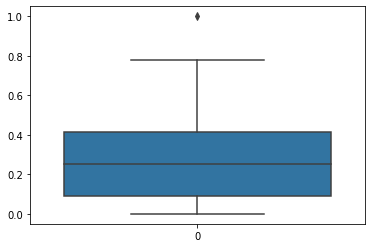

In [31]:
sns.boxplot(data=df['citric acid'])

In [32]:
outlier_finder('citric acid')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
151,9.2,0.52,1.0,3.4,0.61,32.0,69.0,0.9996,2.74,2.0,9.4,4


In [33]:
df=outlier_remover('citric acid')

<AxesSubplot:>

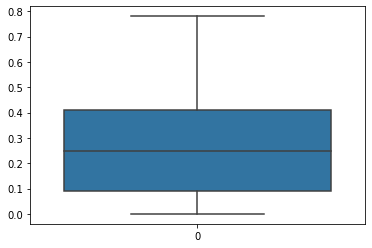

In [34]:
sns.boxplot(data=df['citric acid'])

In [35]:
#removing outliers of residual sugar

<AxesSubplot:>

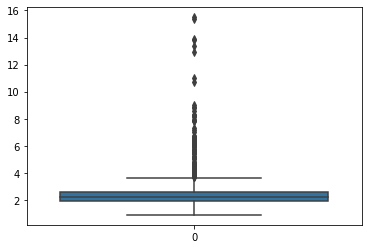

In [36]:
sns.boxplot(data=df['residual sugar'])

In [37]:
outlier_finder('residual sugar')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
14,8.9,0.620,0.18,3.8,0.176,52.0,145.0,0.99860,3.16,0.88,9.2,5
15,8.9,0.620,0.19,3.9,0.170,51.0,148.0,0.99860,3.17,0.93,9.2,5
18,7.4,0.590,0.08,4.4,0.086,6.0,29.0,0.99740,3.38,0.50,9.0,4
33,6.9,0.605,0.12,10.7,0.073,40.0,83.0,0.99930,3.45,0.52,9.4,6
...,...,...,...,...,...,...,...,...,...,...,...,...
1552,6.3,0.680,0.01,3.7,0.103,32.0,54.0,0.99586,3.51,0.66,11.3,6
1558,6.9,0.630,0.33,6.7,0.235,66.0,115.0,0.99787,3.22,0.56,9.5,5
1574,5.6,0.310,0.78,13.9,0.074,23.0,92.0,0.99677,3.39,0.48,10.5,6
1577,6.2,0.700,0.15,5.1,0.076,13.0,27.0,0.99622,3.54,0.60,11.9,6


In [38]:
df=outlier_remover('residual sugar')

<AxesSubplot:>

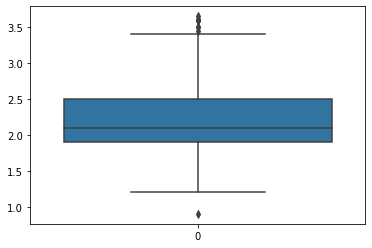

In [39]:
sns.boxplot(data=df['residual sugar'])

In [40]:
#removing outliers of chlorides

<AxesSubplot:>

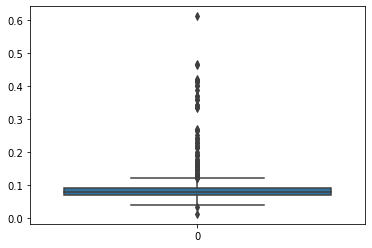

In [41]:
sns.boxplot(data=df['chlorides'])

In [42]:
outlier_finder('chlorides')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
17,8.1,0.560,0.28,1.7,0.368,16.0,56.0,0.99680,3.11,1.28,9.3,5
19,7.9,0.320,0.51,1.8,0.341,17.0,56.0,0.99690,3.04,1.08,9.2,6
42,7.5,0.490,0.20,2.6,0.332,8.0,14.0,0.99680,3.21,0.90,10.5,6
81,7.8,0.430,0.70,1.9,0.464,22.0,67.0,0.99740,3.13,1.28,9.4,5
83,7.3,0.670,0.26,1.8,0.401,16.0,51.0,0.99690,3.16,1.14,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1370,8.7,0.780,0.51,1.7,0.415,12.0,66.0,0.99623,3.00,1.17,9.2,5
1371,7.5,0.580,0.56,3.1,0.153,5.0,14.0,0.99476,3.21,1.03,11.6,6
1374,6.8,0.815,0.00,1.2,0.267,16.0,29.0,0.99471,3.32,0.51,9.8,3
1436,10.0,0.380,0.38,1.6,0.169,27.0,90.0,0.99914,3.15,0.65,8.5,5


In [43]:
df=outlier_remover('chlorides')

<AxesSubplot:>

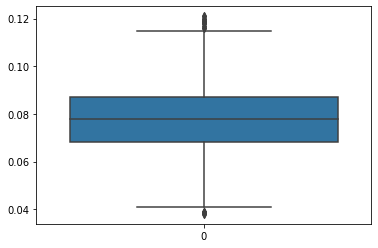

In [44]:
sns.boxplot(data=df['chlorides'])

In [45]:
#removing outliers of free sulfur dioxide

<AxesSubplot:>

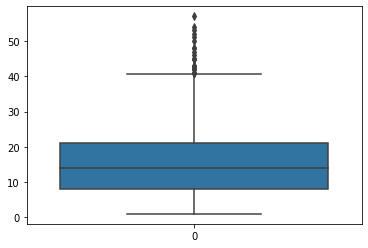

In [46]:
sns.boxplot(data=df['free sulfur dioxide'])

In [47]:
outlier_finder('free sulfur dioxide')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
90,7.9,0.520,0.26,1.90,0.079,42.0,140.0,0.99640,3.23,0.54,9.5,5
497,7.2,0.340,0.32,2.50,0.090,43.0,113.0,0.99660,3.32,0.79,11.1,5
522,8.2,0.390,0.49,2.30,0.099,47.0,133.0,0.99790,3.38,0.99,9.8,5
562,9.0,0.540,0.49,2.90,0.094,41.0,110.0,0.99820,3.08,0.61,9.2,5
584,11.8,0.330,0.49,3.40,0.093,54.0,80.0,1.00020,3.30,0.76,10.7,7
634,7.9,0.350,0.21,1.90,0.073,46.0,102.0,0.99640,3.27,0.58,9.5,5
678,8.3,0.780,0.10,2.60,0.081,45.0,87.0,0.99830,3.48,0.53,10.0,5
853,9.3,0.360,0.39,1.50,0.080,41.0,55.0,0.99652,3.47,0.73,10.9,6
925,8.6,0.220,0.36,1.90,0.064,53.0,77.0,0.99604,3.47,0.87,11.0,7
926,9.4,0.240,0.33,2.30,0.061,52.0,73.0,0.99786,3.47,0.90,10.2,6


In [48]:
df=outlier_remover('free sulfur dioxide')

<AxesSubplot:>

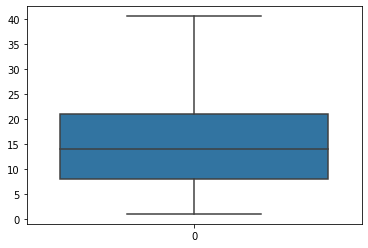

In [49]:
sns.boxplot(data=df['free sulfur dioxide'])

In [50]:
#removing outliers of total sulfur dioxide

<AxesSubplot:>

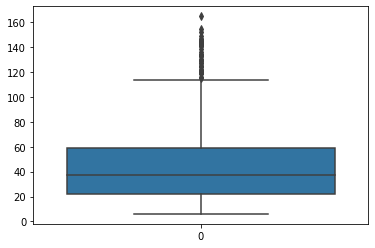

In [51]:
sns.boxplot(data=df['total sulfur dioxide'])

In [52]:
outlier_finder('total sulfur dioxide')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
53,8.6,0.380,0.36,3.0,0.081,30.0,119.0,0.99700,3.20,0.56,9.4,5
79,8.3,0.625,0.20,1.5,0.080,27.0,119.0,0.99720,3.16,1.12,9.1,4
86,8.6,0.490,0.28,1.9,0.110,20.0,136.0,0.99720,2.93,1.95,9.9,6
88,9.3,0.390,0.44,2.1,0.107,34.0,125.0,0.99780,3.14,1.22,9.5,5
92,8.6,0.490,0.29,2.0,0.110,19.0,133.0,0.99720,2.93,1.98,9.8,5
130,8.0,0.745,0.56,2.0,0.118,30.0,134.0,0.99680,3.24,0.66,9.4,5
145,8.1,0.670,0.55,1.8,0.117,32.0,141.0,0.99680,3.17,0.62,9.4,5
188,7.9,0.500,0.33,2.0,0.084,15.0,143.0,0.99680,3.20,0.55,9.5,5
189,7.9,0.490,0.32,1.9,0.082,17.0,144.0,0.99680,3.20,0.55,9.5,5
190,8.2,0.500,0.35,2.9,0.077,21.0,127.0,0.99760,3.23,0.62,9.4,5


In [53]:
df=outlier_remover('total sulfur dioxide')

<AxesSubplot:>

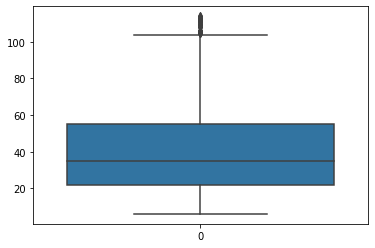

In [54]:
sns.boxplot(data=df['total sulfur dioxide'])

In [55]:
#removing outliers of density

<AxesSubplot:>

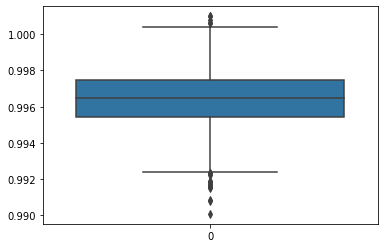

In [56]:
sns.boxplot(data=df['density'])

In [57]:
outlier_finder('density')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
142,5.2,0.340,0.00,1.80,0.050,27.0,63.0,0.99160,3.68,0.79,14.000000,6
289,11.6,0.420,0.53,3.30,0.105,33.0,98.0,1.00100,3.20,0.95,9.200000,5
344,11.9,0.570,0.50,2.60,0.082,6.0,32.0,1.00060,3.12,0.78,10.700000,6
459,11.6,0.580,0.66,2.20,0.074,10.0,47.0,1.00080,3.25,0.57,9.000000,3
465,10.0,0.290,0.40,2.90,0.098,10.0,26.0,1.00060,3.48,0.91,9.700000,5
588,5.0,0.420,0.24,2.00,0.060,19.0,50.0,0.99170,3.72,0.74,14.000000,8
633,10.1,0.935,0.22,3.40,0.105,11.0,86.0,1.00100,3.43,0.64,11.300000,4
821,4.9,0.420,0.00,2.10,0.048,16.0,42.0,0.99154,3.71,0.74,14.000000,7
999,6.4,0.690,0.00,1.65,0.055,7.0,12.0,0.99162,3.47,0.53,12.900000,6
1017,8.0,0.180,0.37,0.90,0.049,36.0,109.0,0.99007,2.89,0.44,12.700000,6


In [58]:
df=outlier_remover('density')

<AxesSubplot:>

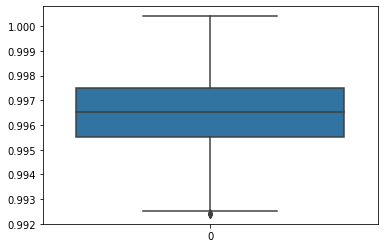

In [59]:
sns.boxplot(data=df['density'])

In [60]:
#removing outliers of pH

<AxesSubplot:>

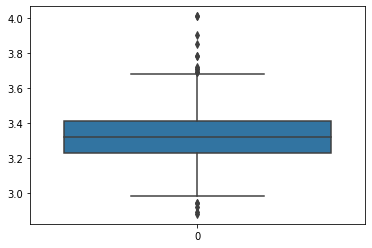

In [61]:
sns.boxplot(data=df['pH'])

In [62]:
outlier_finder('pH')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
45,4.6,0.520,0.15,2.10,0.054,8.0,65.0,0.99340,3.90,0.56,13.1,4
95,4.7,0.600,0.17,2.30,0.058,17.0,106.0,0.99320,3.85,0.60,12.9,6
268,6.9,0.540,0.04,3.00,0.077,7.0,27.0,0.99870,3.69,0.91,9.4,6
650,10.7,0.430,0.39,2.20,0.106,8.0,32.0,0.99860,2.89,0.50,9.6,5
657,12.0,0.500,0.59,1.40,0.073,23.0,42.0,0.99800,2.92,0.68,10.5,7
667,11.3,0.340,0.45,2.00,0.082,6.0,15.0,0.99880,2.94,0.66,9.2,6
930,6.6,0.610,0.01,1.90,0.080,8.0,25.0,0.99746,3.69,0.73,10.5,5
996,5.6,0.660,0.00,2.20,0.087,3.0,11.0,0.99378,3.71,0.63,12.8,7
1111,5.4,0.420,0.27,2.00,0.092,23.0,55.0,0.99471,3.78,0.64,12.3,7
1166,9.9,0.540,0.26,2.00,0.111,7.0,60.0,0.99709,2.94,0.98,10.2,5


In [63]:
df=outlier_remover('pH')

<AxesSubplot:>

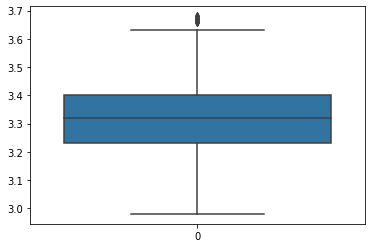

In [64]:
sns.boxplot(data=df['pH'])

In [65]:
#removing outliers of sulphates

<AxesSubplot:>

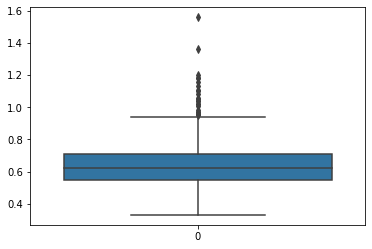

In [66]:
sns.boxplot(data=df['sulphates'])

In [67]:
outlier_finder('sulphates')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
13,7.8,0.610,0.29,1.6,0.114,9.0,29.0,0.99740,3.26,1.56,9.1,5
43,8.1,0.660,0.22,2.2,0.069,9.0,23.0,0.99680,3.30,1.20,10.3,5
69,8.0,0.705,0.05,1.9,0.074,8.0,19.0,0.99620,3.34,0.95,10.5,6
161,7.6,0.680,0.02,1.3,0.072,9.0,20.0,0.99650,3.17,1.08,9.2,4
197,11.5,0.300,0.60,2.0,0.067,12.0,27.0,0.99810,3.11,0.97,10.1,6
245,7.3,0.660,0.00,2.0,0.084,6.0,23.0,0.99830,3.61,0.96,9.9,6
340,12.2,0.340,0.50,2.4,0.066,10.0,21.0,1.00000,3.12,1.18,9.2,6
350,10.7,0.670,0.22,2.7,0.107,17.0,34.0,1.00040,3.28,0.98,9.9,6
369,9.4,0.270,0.53,2.4,0.074,6.0,18.0,0.99620,3.20,1.13,12.0,7
372,9.1,0.280,0.48,1.8,0.067,26.0,46.0,0.99670,3.32,1.04,10.6,6


In [68]:
df=outlier_remover('sulphates')

<AxesSubplot:>

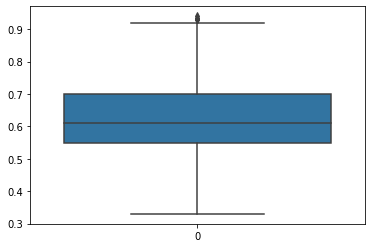

In [69]:
sns.boxplot(data=df['sulphates'])

In [70]:
#removing outliers of alcohol

<AxesSubplot:>

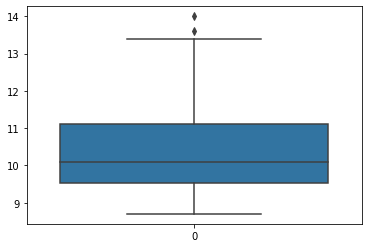

In [71]:
sns.boxplot(data=df['alcohol'])

In [72]:
outlier_finder('alcohol')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
467,8.8,0.46,0.45,2.6,0.065,7.0,18.0,0.9947,3.32,0.79,14.0,6
1132,7.4,0.36,0.34,1.8,0.075,18.0,38.0,0.9933,3.38,0.88,13.6,7


In [73]:
df=outlier_remover('alcohol')

<AxesSubplot:>

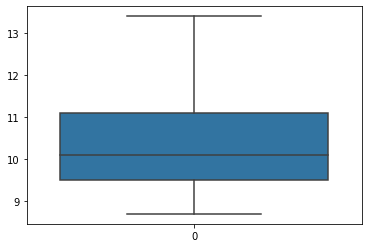

In [74]:
sns.boxplot(data=df['alcohol'])

In [75]:
X=df.drop('quality',axis=1)

In [76]:
y=df.quality

In [77]:
y = df['quality'].apply(lambda y_value: 1 if y_value>=7 else 0 )

In [78]:
##setting good quality wine level as score 7 or above

In [79]:
y.value_counts()

0    860
1    125
Name: quality, dtype: int64

# oversampling to balance the dataset using SMOTE

In [80]:
#over sampling
from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy='minority')
X_res, y_res = smote.fit_resample(X,y)

In [81]:
y_res.value_counts()

0    860
1    860
Name: quality, dtype: int64

In [82]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4


In [83]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res,test_size=.2,random_state =42)

In [85]:
X_train.shape, y_train.shape

((1376, 11), (1376,))

In [86]:
X_test.shape, y_test.shape

((344, 11), (344,))

In [87]:
y_train.value_counts(),y_test.value_counts()

(1    691
 0    685
 Name: quality, dtype: int64,
 0    175
 1    169
 Name: quality, dtype: int64)

# Build Classification Models

In [88]:
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

# Defining learning classifiers

In [89]:
names = ['SGDClassifier()',
               'DecisionTreeClassifier()',
               'RandomForestClassifier()',
               'XGBClassifier()',
               'KNeighborsClassifier(n_neighbors=1)']

classifiers = [SGDClassifier(),
               DecisionTreeClassifier(),
               RandomForestClassifier(),
               XGBClassifier(),
               KNeighborsClassifier(n_neighbors=1)]

In [90]:
scores = []
for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    scores.append(score)

In [91]:
scores

[0.6453488372093024,
 0.875,
 0.9331395348837209,
 0.9418604651162791,
 0.9302325581395349]

In [92]:
df2 = pd.DataFrame()
df2['name'] = names
df2['score'] = scores
df2.sort_values('score')

,name,score
0,SGDClassifier(),0.645349
1,DecisionTreeClassifier(),0.875000
4,KNeighborsClassifier(n_neighbors=1),0.930233
2,RandomForestClassifier(),0.933140
3,XGBClassifier(),0.941860


# comparing two best models

In [93]:
from sklearn.ensemble import RandomForestClassifier

In [94]:
score1=cross_val_score(RandomForestClassifier(),X_res,y_res,cv=10)

In [95]:
score1

array([0.95930233, 0.97093023, 0.9244186 , 0.93604651, 0.98837209,
       0.87790698, 0.86046512, 0.87209302, 0.95930233, 0.8255814 ])

In [96]:
score1.mean()

0.9174418604651162

In [97]:
from xgboost import XGBClassifier

In [98]:
score2=cross_val_score(XGBClassifier(),X_res,y_res,cv=10)

In [99]:
score2

array([0.9244186 , 0.95348837, 0.93604651, 0.94767442, 0.98837209,
       0.88372093, 0.87790698, 0.89534884, 0.95930233, 0.87790698])

In [100]:
score2.mean()

0.9244186046511628

# Hyperparameter tuning

In [101]:
params={
 "learning_rate"    : [0.15, 0.30 ] ,
 "max_depth"        : [ 6, 10],
 "min_child_weight" : [ 1, 3 ],
 "gamma"            : [ 0.0, 0.3 ]
    
}

In [102]:
model=XGBClassifier()

In [103]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [104]:
#hypersearch=RandomizedSearchCV(model,param_distributions=params,n_iter=5,scoring='accuracy',n_jobs=-1,cv=5,verbose=3)

In [105]:
hypersearch=GridSearchCV(model,param_grid=params,scoring='accuracy',n_jobs=-1,cv=5,verbose=3)

In [106]:
hypersearch.fit(X_res,y_res)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_ca...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, ...),
             n_jobs=-1,
             param_grid={'gamma': [0.0, 0.3], 'learning_rate': [0.15, 0.3],
                         'max_depth': [6, 10], 'min_child_weight': [1, 3]},
             scoring='accuracy', verbose=3)

In [107]:
tunedmodel=hypersearch.best_estimator_

In [108]:
hypersearch.best_params_

{'gamma': 0.0, 'learning_rate': 0.3, 'max_depth': 10, 'min_child_weight': 1}

In [109]:
##since XGB classifier performs the best we will choose it to make our model

In [110]:
model2=tunedmodel

# checking model accuracy

In [111]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(model2, X_train, y_train, cv=10)

In [112]:
y_train_pred

array([0, 1, 1, ..., 0, 1, 1])

In [113]:
s=lambda y_value: 1 if y_value>=0.7 else 0
y_train_pred=np.array([s(x) for x in y_train_pred])

In [114]:
y_train_pred

array([0, 1, 1, ..., 0, 1, 1])

In [115]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, y_train_pred)

array([[608,  77],
       [ 29, 662]], dtype=int64)

In [116]:
from sklearn.metrics import precision_score, recall_score
ps=precision_score(y_train, y_train_pred)
ps #precision score

0.8958051420838972

In [117]:
rs=recall_score(y_train, y_train_pred)
rs #recall score

0.9580318379160637

In [118]:
f1=2*((ps*rs)/(ps+rs))
f1 #f1 score

0.9258741258741259

In [119]:
model2.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.3, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=10, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [120]:
## finally checking the score of the model on test set

In [121]:
result=model2.score(X_test, y_test)
print(result)

0.9418604651162791


In [122]:
from sklearn import metrics

In [123]:
print(metrics.confusion_matrix(y_train, y_train_pred))
print(metrics.classification_report(y_train, y_train_pred,digits=3))

[[608  77]
 [ 29 662]]
              precision    recall  f1-score   support

           0      0.954     0.888     0.920       685
           1      0.896     0.958     0.926       691

    accuracy                          0.923      1376
   macro avg      0.925     0.923     0.923      1376
weighted avg      0.925     0.923     0.923      1376



# Pickling the model

In [124]:
data = [[8,0.4,0.4,3,0.07,8,20,0.9950,3.2,0.7,11]]

In [125]:
inputdf = pd.DataFrame(data, columns=['fixed acidity', 'volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol'])

In [126]:
inputdf

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,8,0.4,0.4,3,0.07,8,20,0.995,3.2,0.7,11


In [127]:
model2.predict(inputdf)

array([1])

In [133]:
# pickle.dump(model2, open('wine_quality_model.pkl', 'wb'))

In [134]:
# modelcheck=pickle.load(open('wine_quality_model.pkl','rb'))

In [135]:
# prediction=modelcheck.predict(inputdf)

In [136]:
# prediction[0]

1